# Oversampling Studies

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./../train_cleaned.csv')

In [5]:
df.head()

,text,labels,length,stemmed_text,simple_cleaned_text,corrected_text,n_errors,ratio_err
0,Many people have car where they live. The thin...,3,545,peopl car live thing know us car alot thing ha...,many people have car where they live the thing...,many people have car where they live the thing...,15,0.027523
1,I am a scientist at NASA that is discussing th...,3,371,scientist nasa discuss face mar explain face l...,scientist nasa that discussing the face mars w...,scientist nasa that discussing the face mars w...,3,0.008086
2,People always wish they had the same technolog...,4,605,peopl wish technolog seen movi best new piec t...,people always wish they had the same technolog...,people always wish they had the same technolog...,3,0.004959
3,"We all heard about Venus, the planet without a...",4,511,heard venu planet oxygen earthquak erupt volca...,all heard about venus the planet without almos...,all heard about venus the planet without almos...,1,0.001957
4,"Dear, State Senator\n\nThis is a letter to arg...",3,418,dear state senat letter argu favor keep electo...,dear state senator this letter argue favor kee...,dear state senator this letter argue favor kee...,6,0.014354


In [3]:
from skimpy import skim

In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17307  │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25      ┃ p50     ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ labels          │   0 │      0 │     2.9 │       1 │     1 │        2 │       3 │      4 │     6 │  ▂▆▇▅▁  │  │
│ │ length          │   0 │      0 │     410 │     170 │   150 │      280 │     380 │    500 │  1700 │   ▇▅▁   │  │
│ │ n_errors        │   0 │      0 │     5.4 │     4.8 │     0 │        2 │       4 │      7 │    68 │   ▇▁    │  │
│ │ ratio_err       │   0 │      0 │   0.014 │   0.013 │     0 │   0.0053 │   0.011 │  0.019 │  0.15 │   ▇▁    │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴───────┴──────────┴─────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ text                                 │     0 │         0 │                      380 │              6643794 │  │
│ │ stemmed_text                         │     0 │         0 │                      160 │              2684993 │  │
│ │ simple_cleaned_text                  │     0 │         0 │                      290 │              5022353 │  │
│ │ corrected_text                       │     0 │         0 │                      290 │              5024506 │  │
│ └──────────────────────────────────────┴───────┴───────────┴──────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Idée

* Pour établir formellement un seuil d'undersampling, une approche pertinente est d'utiliser **l'Inégalité de Hoeffding** ou **l'Inégalité de Chernoff**.

* Ces méthodes permettent de quantifier la déviation d'une somme de variables aléatoires (les lables) par rapport à la moyenne attendue avec une probabilité bien définie.

## Step 1 : Définition du problème

In [24]:
n = df.shape[0]
print(f'le jeu de données contient {n} points')
k = df['labels'].nunique()
print(f'le jeu de données contient {k} classes :')
pi = [df[df['labels']==i].shape[0] for i in range(1,k+1)]
for i in range(k):
    print(f'\tla classe {i+1} contient {pi[i]} points')

le jeu de données contient 17307 points
le jeu de données contient 6 classes :
	la classe 1 contient 1252 points
	la classe 2 contient 4723 points
	la classe 3 contient 6280 points
	la classe 4 contient 3926 points
	la classe 5 contient 970 points
	la classe 6 contient 156 points


In [25]:
# plot the distribution of labels using plotly
import plotly.express as px

fig = px.histogram(df, x='labels', title='Distribution of labels', nbins=20, width=800, height=400, text_auto=True)
fig.show()

On veut réduire le nombre d'échantillons dans les classes majoritaires tout en augmentant les minoritaires pour atteindre une distribution plus équilibrée

Sans perdre significativement en précision statistique

## Step 2 : Utilisation de l'Inégalité de Hoeffding

L'inégalité de Hoeffding peut être utilisée pour estimer le nombre minimal d'échantillons ni dans chaque classe *i* pour garantir que la fréquence observée *p'i* de la classe *i* dans l'échantillon reste proche de la fréquence réelle *pi* avec un niveau de confiance donnée

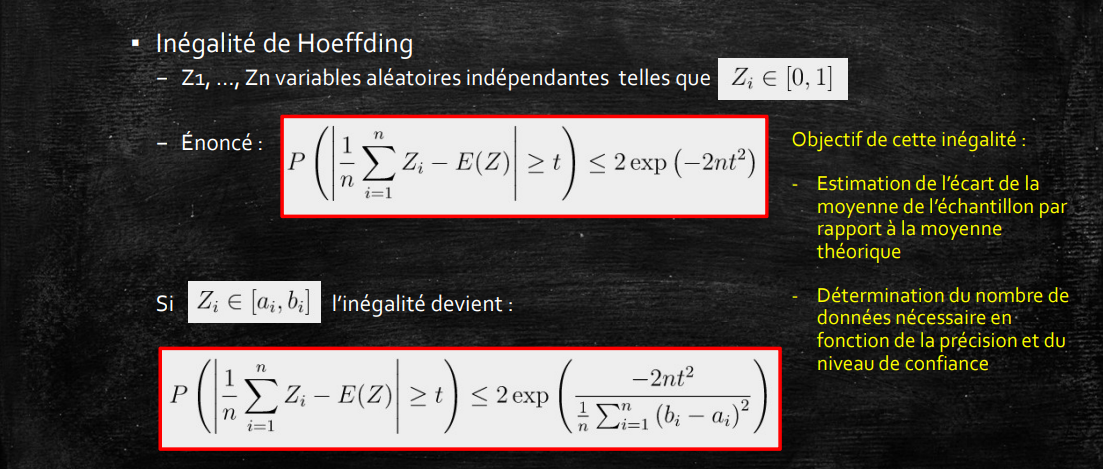

Pour fixer un niveau de confiance *alpha* (par exemple 95% ou 99%) et une marge d'erreur *t*, pour *ni* : 

2.exp.(-2.ni.t²) = alpha 

ni = log(2/alpha)/(2.t²)

In [26]:
import numpy as np

In [27]:
import numpy as np
def get_hoeffding_ni(alpha: float, epsilon: float) -> float:
    """
    Calculate the Hoeffding's sample size for a given confidence level (alpha) and error tolerance (epsilon).

    Args:
        alpha (float): Confidence level (between 0 and 1).
        epsilon (float): Error tolerance (positive value).

    Returns:
        float: Hoeffding's sample size.

    Raises:
        ValueError: If alpha is not between 0 and 1, or epsilon is not a positive value.
    """
    if not 0 < alpha < 1:
        raise ValueError("alpha must be between 0 and 1")
    if epsilon <= 0:
        raise ValueError("epsilon must be a positive value")

    return np.log(2 / alpha) / (2.0 * (epsilon ** 2))


## Step 3 : Application pour déterminer

Pour chaque classe, on calcule le *ni* nécessaire pour atteindre le niveau de confiance souhaité avec une marge d'erreur *t*.

Le maximum des *ni* calculés pour les classes sur-représentées peut servir de seuil d'undersampling

In [28]:
from typing import List

In [36]:
confidence_levels: List[float] = [0.1, 0.05, 0.01]
errors: List[float] = [0.1, 0.05, 0.01]

list_ni = []
for alpha in confidence_levels:
    for epsilon in errors:
        ni = get_hoeffding_ni(alpha, epsilon)
        list_ni.append(ni)
        print(f"alpha: {1 - alpha}, epsilon: {epsilon}, ni: {ni}")

alpha: 0.9, epsilon: 0.1, ni: 149.7866136776995
alpha: 0.9, epsilon: 0.05, ni: 599.146454710798
alpha: 0.9, epsilon: 0.01, ni: 14978.661367769953
alpha: 0.95, epsilon: 0.1, ni: 184.44397270569678
alpha: 0.95, epsilon: 0.05, ni: 737.7758908227871
alpha: 0.95, epsilon: 0.01, ni: 18444.39727056968
alpha: 0.99, epsilon: 0.1, ni: 264.91586832740177
alpha: 0.99, epsilon: 0.05, ni: 1059.663473309607
alpha: 0.99, epsilon: 0.01, ni: 26491.58683274018
